In [2]:
import pandas as pd
import numpy as np

In [4]:
import dask.dataframe as dd
df = dd.read_csv('data/gleif1.csv', dtype=str)

In [6]:
df.head(2)

,LEI,Entity.LegalName,Entity.LegalName.xmllang,Entity.OtherEntityNames.OtherEntityName.1,Entity.OtherEntityNames.OtherEntityName.1.xmllang,Entity.OtherEntityNames.OtherEntityName.1.type,Entity.OtherEntityNames.OtherEntityName.2,Entity.OtherEntityNames.OtherEntityName.2.xmllang,Entity.OtherEntityNames.OtherEntityName.2.type,Entity.OtherEntityNames.OtherEntityName.3,...,Registration.OtherValidationAuthorities.OtherValidationAuthority.2.ValidationAuthorityEntityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.3.OtherValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityEntityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.4.ValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.4.OtherValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.4.ValidationAuthorityEntityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.5.ValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.5.OtherValidationAuthorityID,Registration.OtherValidationAuthorities.OtherValidationAuthority.5.ValidationAuthorityEntityID
0,001GPB6A9XPE8XJICC14,FIDELITY ADVISOR SERIES I - Fidelity Advisor L...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004L5FPTUREIWK9T2N63,"Hutchin Hill Capital, LP",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['LEI', 'Entity.LegalName', 'Entity.LegalName.xmllang',
       'Entity.OtherEntityNames.OtherEntityName.1',
       'Entity.OtherEntityNames.OtherEntityName.1.xmllang',
       'Entity.OtherEntityNames.OtherEntityName.1.type',
       'Entity.OtherEntityNames.OtherEntityName.2',
       'Entity.OtherEntityNames.OtherEntityName.2.xmllang',
       'Entity.OtherEntityNames.OtherEntityName.2.type',
       'Entity.OtherEntityNames.OtherEntityName.3',
       ...
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.2.ValidationAuthorityEntityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.3.OtherValidationAuthorityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.3.ValidationAuthorityEntityID',
       'Registration.OtherValidationAuthorities.OtherValidationAuthority.4.ValidationAuthorityID',
       'Registration.Othe

In [9]:
df.shape

(Delayed('int-56030414-2b80-473f-8412-d6975703c110'), 337)

In [ ]:
LEI
Entity.LegalName
Entity.LegalJurisdiction
Entity.LegalForm.EntityLegalFormCode
Entity.EntityStatus
Entity.RegistrationAuthority.RegistrationAuthorityEntityID
Entity.EntityCategory
Registration.RegistrationStatus
Registration.LastUpdateDate

In [11]:
df2 = df[["LEI", "Entity.LegalName", "Entity.LegalJurisdiction","Entity.LegalForm.EntityLegalFormCode", "Entity.EntityStatus", "Entity.RegistrationAuthority.RegistrationAuthorityEntityID",
 "Entity.EntityCategory", "Registration.RegistrationStatus", "Registration.LastUpdateDate"]]

In [12]:
df2.head(2)

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
0,001GPB6A9XPE8XJICC14,FIDELITY ADVISOR SERIES I - Fidelity Advisor L...,US-MA,8888,ACTIVE,S000005113,FUND,ISSUED,2022-05-20T09:35:00.000Z
1,004L5FPTUREIWK9T2N63,"Hutchin Hill Capital, LP",US-DE,T91T,ACTIVE,4386463,GENERAL,LAPSED,2020-07-17T12:40:00.000Z


In [13]:
df2.columns

Index(['LEI', 'Entity.LegalName', 'Entity.LegalJurisdiction',
       'Entity.LegalForm.EntityLegalFormCode', 'Entity.EntityStatus',
       'Entity.RegistrationAuthority.RegistrationAuthorityEntityID',
       'Entity.EntityCategory', 'Registration.RegistrationStatus',
       'Registration.LastUpdateDate'],
      dtype='object')

## Exercise 1: Find all Public Limited Companies (PLCs) in Great Britain

In the LEI data you can identify the legal form of an entity using the field
‘Entity.LegalForm.EntityLegalFormCode’. Public Limited Companies in Great Britain are assigned
EntityLegalFormCode ‘B6ES’. Please identifiy all Public Limitied Companies (PLCs) in Great Britain.

In [14]:
df3 = df2.loc[df2["Entity.LegalForm.EntityLegalFormCode"]== "B6ES"]

In [15]:
df3.head()

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,ACTIVE,SC286832,GENERAL,ISSUED,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,ACTIVE,03967805,GENERAL,LAPSED,2019-01-15T13:19:01.703Z
4429,21380011BEY3JSQ3AU68,PARSLEY BOX GROUP PLC,GB,B6ES,ACTIVE,SC685656,GENERAL,ISSUED,2022-03-22T04:13:11.243Z
4441,21380011EU95E93AQN91,SULNOX GROUP PLC,GB,B6ES,ACTIVE,08449586,GENERAL,ISSUED,2022-03-22T04:13:43.710Z
4468,21380011L2Y2O7QAFQ89,NORTHERN & SHELL PLC,GB,B6ES,ACTIVE,04086466,GENERAL,ISSUED,2022-04-25T08:03:08.680Z


In [34]:
df3["Registration.RegistrationStatus"].value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: Registration.RegistrationStatus, dtype: int64
Dask Name: value-counts-agg, 165 tasks

In [57]:
df3["Entity.EntityStatus"].value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: Entity.EntityStatus, dtype: int64
Dask Name: value-counts-agg, 165 tasks

## Exercise 2: Visualize the EntityStatus and RegistrationStatus of the entities you identified in exercise 1

Each LEI Record has an EntityStatus (Entity.EntityStatus) and a RegistrationStatus (Registration.RegistrationStatus). Based on your results from exercise 1, please 

visualize the EntityStatus and the RegistrationStatus for these LEI Records. 

Can you describe how the fields EntityStatus and RegistrationStatus are related to each other?

In [33]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df3.corr(),cbar=True,annot=True,cmap='Blues')
# plt.title('Correlation heat map', fontweight='bold')

In [18]:
#Renaming the column names
df4 = df3.rename(columns={"Entity.EntityStatus": "EntityStatus", "Entity.LegalJurisdiction":"LegalJurisdiction", 
"Registration.RegistrationStatus": "RegistrationStatus"})

In [19]:
df4.head(2)

,LEI,Entity.LegalName,LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,ACTIVE,SC286832,GENERAL,ISSUED,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,ACTIVE,03967805,GENERAL,LAPSED,2019-01-15T13:19:01.703Z


In [58]:
cleanup = {"RegistrationStatus":{"ISSUED": 1, "LAPSED": 0, "RETIRED": 2, "DUPLICATE": 3, "PENDING_ARCHIVAL": 4}, "EntityStatus":{"ACTIVE":1, "INACTIVE":0}}
df4 = df4.replace(cleanup)

In [59]:
df4.head(2)

,LEI,Entity.LegalName,LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,1.0,SC286832,GENERAL,1,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,1.0,03967805,GENERAL,0,2019-01-15T13:19:01.703Z


In [55]:
df4.tail(2)

,LEI,Entity.LegalName,LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,RegistrationStatus,Registration.LastUpdateDate
93950,ZIMCVQHUFZ8GVHENP290,BUPA FINANCE PLC.,GB,B6ES,1,02779134,GENERAL,1,2022-01-11T21:31:00.000Z
93992,ZLECI7ED2QMWFGYCXZ59,ITV PLC,GB,B6ES,1,04967001,GENERAL,1,2021-07-22T15:31:00.000Z


In [64]:
df4["RegistrationStatus"].value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: RegistrationStatus, dtype: int64
Dask Name: value-counts-agg, 349 tasks

In [63]:
df4["EntityStatus"].value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: EntityStatus, dtype: int64
Dask Name: value-counts-agg, 349 tasks

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='EntityStatus', ylabel='Count'>

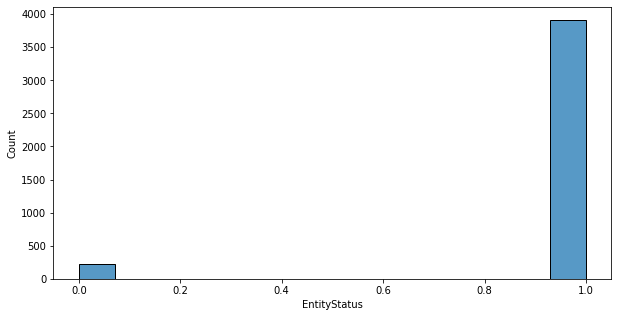

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(x="EntityStatus", data=df4)


<AxesSubplot:xlabel='RegistrationStatus', ylabel='Count'>

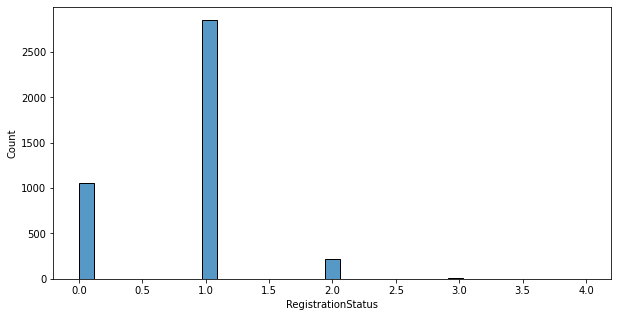

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(x="RegistrationStatus", data=df4)

In [65]:
# plt.figure(figsize=(10,5))
# sns.countplot(x="LegalJurisdiction", hue="EntityStatus", data=df4)

### Exercise 3: Find the ultimate parents of all entities from exercise 1

In exercise 1 and 2 we used the so-called LEI data (LEI-CDF v3.1 files). 
For exercise 3 we will additionally use the so-called relationship data (RR-CDF v2.1 files).
To identify an ultimate parent, you need to only consider those relationship records with
Relationship.RelationshipType ‘IS_ULTIMATELY_CONSOLIDATED_BY’. The
Relationship.StartNode.NodeID indicates the child of a relationship. For this exercise we are only
interested in those StartNodes that you have identified in exercise 1. The
Relationship.EndNode.NodeID denotes the LEI code of the parent entity of the respective
StartNode.

How many ultimate parents did you find?
How would you explain “missing” ultimate parents?

### Exercise 3: Identify potential duplicates in Great Britain


In the Global LEI System each legal entity shall only receive one unique LEI code. In some rare
cases it can happen that two LEI codes are assigned to the same legal entity. If such a duplicate
has been identified, one of the duplicate records will receive the RegistrationStatus DUPLICATE.
These duplicate records remain in the Global LEI repository, as the LEI is a life long identifier and
can never be reused. Please identify potential duplicates in the legal jurisdiction of Great Britain (GB) based on similar
legal names (Entity.LegalName).

What is your approach to compare the different legal names?
Which other elements of the reference data besides the legal name could be used to identify
duplicate records?

In [66]:
df3.head(2)

,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
3740,0TMBS544NMO7GLCE7H90,ABRDN PLC,GB,B6ES,ACTIVE,SC286832,GENERAL,ISSUED,2022-03-28T14:21:02.157Z
4389,2138001123F8QFPOZ919,TANGENT COMMUNICATIONS PLC,GB,B6ES,ACTIVE,03967805,GENERAL,LAPSED,2019-01-15T13:19:01.703Z


In [67]:
df5 = df3.loc[df3["Registration.RegistrationStatus"]== "DUPLICATE"]

In [68]:
df5.head(10)

/root/.pyenv/versions/3.9.4/lib/python3.9/site-packages/dask/dataframe/core.py:7480: UserWarning: Insufficient elements for `head`. 10 elements requested, only 1 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


,LEI,Entity.LegalName,Entity.LegalJurisdiction,Entity.LegalForm.EntityLegalFormCode,Entity.EntityStatus,Entity.RegistrationAuthority.RegistrationAuthorityEntityID,Entity.EntityCategory,Registration.RegistrationStatus,Registration.LastUpdateDate
93800,213800GBJ1RNNUKP2182,OROGEN PLC,GB,B6ES,NaN,05379931,GENERAL,DUPLICATE,2022-03-24T07:38:44.517Z
